# Python Visualizations

In [1]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import pyplot
import matplotlib.pyplot as plt

# run matplotlib inline for displaying using Jupyter notebook
%matplotlib inline

# import seaborn
import seaborn as sns

# matplotlib
#### Display a Plot
- Display plots inline in Jupyter Notebook    
    - `%matplotlib inline` 
- Display a figure
    - `plt.show()`
- Save a figure as an image
    - `plt.savefig('filename.png')`

#### Assigning Data
- `plt.plot(x-var, y-var[, options])`
    - Options
        - `color=''`
- Can assign more than one plot to the same graph, just specify the same `x-var` in multiple `plt.plot` commands
    - specify a different color for each plot

#### Labels and Axis Control
- Labels and Graph Items
    - `plt.xlabel(string)`
    - `plt.ylabel(string)`
    - `plt.title(string)`
- Axis Ranges (use either tuples or lists to supply)
    - `plt.axis([xmin, xmax, ymin, ymax])`
        - sets all at once
    - `plt.xlim([xmin, xmax])` sets only the x axis 
        - will use default vertical scale that fits all the data
    - `plt.ylim([ymin, ymax])` sets only the y axis
        - will use default horizontal scale that fits all the data
    - other `axis` options
        - `'off'` hides the axis lines/labels
        - `'equal'` sets the scale equal for x, y
            - equal axis doesn't mean square plot, especially evident with multiple plots
        - `'square'` forces a square plot
        - `'tight'` sets xlim(), ylim() to show all data
    - `xticks` which is different than above and useful for datetimes
        - `plt.xticks(data, labels, rotation=)`
            - specify the data to use for the x axis first as a variable
            - the labels to display second as a variable
                - only difference between data/labels should be formatting
                - there should be the same number of entries
            - set the rotation as desired to an angle in degress
- Rotate x axis labels
    - `plt.gcf().autofmt_xdate()`
        - this auto rotates
    - `plt.xticks(rotation=60)`
        - set it manually, 60 deg is a good choice

#### Selecting and Formatting Dates for Axes (x data)
- Set the index of a pandas df to datetimes
    - reindexing based on datetimes and sorting data
    - see pandas jupyter for more information
- Store the data of interest in a var using datetime slicing
    - `data = df['datetime_string'[:'datetime_end']]`
- Store the index values
    - `dates = df.index[]`
        - use slicing to get the proper labels
        - useful to use `df.index[::num]` to skip dates and only select certain invervals for labels
- Format the labels using `strftime`
    - `labels = dates.strftime('format_string')`

#### Default Style Sheets
- Provides defaults for lines, points, backgrounds, etc.
- `plt.style.availabe`
    - provides a list of styles available to use
- `plt.style.use('style')` to set the style to use
    - `'ggplot'`
    - `'fivethirtyeight'`

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

  state/region   ages  year  population
0           SC  total  1990   3501155.0
1           SC  total  1991   3570404.0
2           SC  total  1992   3620464.0
3           SC  total  1993   3663314.0
4           SC  total  1994   3705397.0



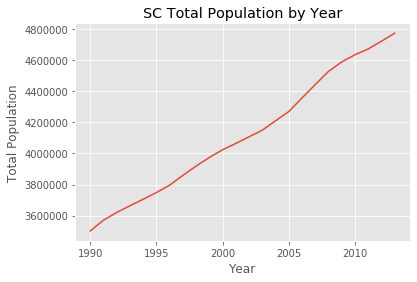

In [2]:
# import state population data
df = pd.read_csv('DSHB_Data\state-population.csv')

print(df.head())
print()

# filter data to SC total population
sc_filter = np.logical_and(df['state/region'] == 'SC', df['ages'] == 'total')

# subset the data to SC total population and reset index
sc_pop_data = df[sc_filter]
sc_sorted_pop_data = sc_pop_data.sort_values('year')
sc_sorted_pop_data.reset_index(inplace=True)
del sc_sorted_pop_data['index']

print(sc_sorted_pop_data.head())
print()

# get the years
years = list(sc_sorted_pop_data['year'])

# get the total population
tot_pop = list(sc_sorted_pop_data.loc[:, 'population'])

# create the plot

# set plot style to 'ggplot'
plt.style.use('ggplot')

plt.plot(years, tot_pop)

# configure the plot labels
plt.title('SC Total Population by Year')
plt.xlabel('Year')
plt.ylabel('Total Population')

plt.show()

#### Multiple Plots Using 'Axes'
- Assigning axes values
    - Useful for control over axes
    - Useful when showing multiple sets on one plot that have different value ranges
        - can produce two plots side by side if you specify these numbers correctly
            - could also overlay
            - depends on where your bottom left corner is, and the width you set
        - can produce two plots on top of each other
            - adjust your bottom left corner and the height you set
    - `plt.axes([x_lo, y_lo, width, height])`
        - list args all expressed in 'figure units'(numbers 0-1 scaled to the dimensions of the figure)
            - `x_lo` 
            - `y_lo`
                - these two values set the lower left corner locations of the plot
            - `width`
            - `height`
                - these two values set the size of the plot
        - every `plt.` command that follows will use the specified `axes` until it is changed
        - the first `axes` command will appear on the left of the plot, the second on the right
- **Inset Plots**
    - set the `plt.axes` for one plot, and don't set it for another plot
    - you decide the location of the inset plot using `x_lo` and `y_lo`
    - you decide the size of the plot with `width` and `height`
    - `plt.axes([0.25, 0.5, 0.35, 0.35])` might be a good starting point

#### Multiple Plots Using 'Subplot' (better than axes)
- Use to display multiple plots
    - the 'rows' and 'cols' below are how the different plots are arranged
    - 'rows' and 'cols' numbers are 1-indexed starting at the top left corner
- `plt.subplot(nrows, ncols, nsubplot)`
    - `nrows` = number of rows
    - `ncols` = number of columns
    - `nsubplot` = the number of the subplot to activate for subsequent commands
        - numbering is left to right, then down a row, left to right like numbering words on a page
        - each command that follows applies to the active subplot, until another subplot is activated
    - `plt.subplot(1, 2, x)` is side by side
    - `plt.subplot(2, 1, x)` is top and bottom
- `plt.tight_layout()`
    - Makes sure that axis labels/titles don't overlap

  state/region   ages  year  population
0           SC  total  1990   3501155.0
1           SC  total  1991   3570404.0
2           SC  total  1992   3620464.0
3           SC  total  1993   3663314.0
4           SC  total  1994   3705397.0

  state/region   ages  year  population
0           FL  total  1990  13033307.0
1           FL  total  1991  13369798.0
2           FL  total  1992  13650553.0
3           FL  total  1993  13927185.0
4           FL  total  1994  14239444.0



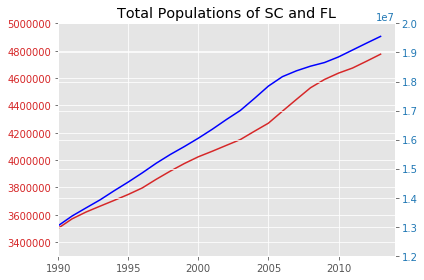

In [3]:
# use the state population dataframe from before

# compare SC data to FL data
# filter data to FL total population
fl_filter = np.logical_and(df['state/region'] == 'FL', df['ages'] == 'total')

# subset the data to SC total population and reset index
fl_pop_data = df[fl_filter]
fl_sorted_pop_data = fl_pop_data.sort_values('year')
fl_sorted_pop_data.reset_index(inplace=True)
del fl_sorted_pop_data['index']

print(sc_sorted_pop_data.head())
print()

print(fl_sorted_pop_data.head())
print()

# years and tot_pop still populated for SC

# get the years for FL
fl_years = list(fl_sorted_pop_data.loc[:, 'year'])

# get the total population for FL
fl_tot_pop = list(fl_sorted_pop_data.loc[:, 'population'])

# set the plot style
plt.style.use('ggplot')

# parse the subplot to first configure sc plot
fig, sc_ax = plt.subplots()

# configure the SC plot
color = 'tab:red'
sc_ax.set_xlabel = ('Years')
sc_ax.set_ylabel = ('SC Total Population')
sc_ax.plot(years, tot_pop, color=color)
sc_ax.tick_params(axis='y', labelcolor=color)
sc_ax.set(xlim=(1990, 2014))
sc_ax.set(ylim=(3300000, 5000000))
sc_ax.axis('on')

# configure the FL plot
fl_ax = sc_ax.twinx() # create a second axis that shares the same x-axis

color = 'tab:blue'
fl_ax.set_ylabel = ('FL Total Population')
fl_ax.plot(years, fl_tot_pop, color='blue')
fl_ax.tick_params(axis='y', labelcolor=color)
fl_ax.set(xlim=(1990, 2014))
fl_ax.set(ylim=(12000000, 20000000))

plt.title('Total Populations of SC and FL')

fig.tight_layout()

plt.show()

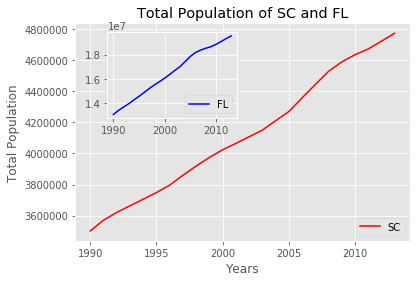

In [4]:
# create an inset plot of the same data above

# plot sc data in the full view
plt.plot(years, tot_pop, color='red', label='SC')
plt.title('Total Population of SC and FL')
plt.xlabel('Years')
plt.ylabel('Total Population')

plt.legend(loc='lower right')

# set axes for FL plot
plt.axes([0.2, 0.55, 0.3, 0.3])
plt.plot(years, fl_tot_pop, color='blue', label='FL')

plt.legend(loc='lower right')

plt.show()

#### Scatter Plots
- `plt.scatter(x_data, y_data, marker='', color='', label='')`
    - `marker` is used to set the shape of the marker
    - `color` is pretty obvious
    - `label` is important if creating a legend

#### Legend and Annotate for Labeling Plots
- `plt.legend(loc='')`
    - must supply a `label` for each plot (see scatter example above)
    - supply a `loc` description as a string listed below or its integer counterpart
        - 'upper left' = 2
        - 'center left' = 6
        - 'best' = 0
        - 'upper center' = 9
        - 'center' = 10
        - 'lower center' = 8
        - 'upper right' = 1
        - 'center right' = 7
        - 'lower right' = 4
        - 'right' = 5
- `plt.annotate('label', xy=(xcoord, ycoord)[, xytext(xcoord, ycoord), arrowprops])`
    - will place your supplied 'label' at the xy coordinates specified by your supplied tuple
    - can draw an arrow if you supply `xytext` and `arrowprops`
        - `arrowprops` is a dictionary with the arrow's properties
            - `{'color':''}` at mininum to draw the arrow
            - `xy` will be where the arrow points
            - `xytext` is where the text is and where the arrow comes from

## 2D Arrays/Figures with Meshgrid
#### Numpy's Meshgrid
- Creating a quick meshgrid
    - `Y, X = np.meshgrid(range(10), range(20)`
        - will create two arrays of shape (20, 10) with steps of 1
- Creating a custom meshgrid
    - `u = np.linspace(start, stop, num)`
        - `stop` is included unless `endpoint=False`
    - `v = np.linspace(start, stop, num)`
    - `X, Y = meshgrid(u, v)`
        - creates your custom arrays of shape 'step' from u, 'step' from v
        - values are 'num' from u, and 'num' from v

#### plt.pcolor
- Creates a plot with colors used to represent different values
    - creates a pixelated plot, with pixels of different colors
    - good for storing/plotting images
    - the number of pixels is determined by your meshgrid
- `plt.pcolor([X, Y,] Z [cmap=''])`
    - Z is the data to plot
    - X and Y can specify axis values
        - default is the size of the mesh grid
    - `cmap` defines the color scheme

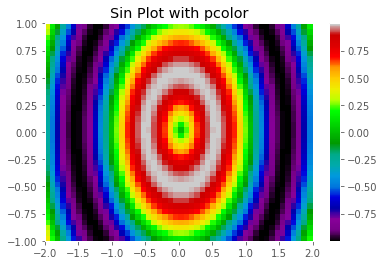

In [5]:
# create a sin plot using meshgrid and pcolor

# create two 1-d arrays
# increasing the number of points changes the resolution of the plot
u = np.linspace(-2, 2, 51)
v = np.linspace(-1, 1, 41)

# create a meshgrid based on the 1-d arrays
X, Y = np.meshgrid(u, v)

# compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2))

# create the color plot using pcolor
plt.pcolor(X, Y, Z, cmap='nipy_spectral')  # set the cmap='' to change the color scheme
    # just doing plt.pcolor(Z) will use the dimensions of the mesh (51, 41) as the axis scales
    # occurs when omitting X, Y from the plt.pcolor() call above
plt.colorbar()  # displays a color bar as a key for the values of each pixel
plt.axis('tight') # fixes issues with whitespace around figures
plt.title('Sin Plot with pcolor')
plt.show()

#### plt.contour
- Similar to pcolor, but will show contour lines for constant values
    - good for maps or other continuous data types
- `plt.contour([X, Y,] Z[, num])`
    - where `Z` is the equation based on a meshgrid
    - X and Y are optional to provide your data range vs. size of the meshgrid
    - `num` is the number of contour lines to draw
- `plt.contourf()`
    - 'filled' contour plot, transitions are not continuous
        - increase the `num` of lines to makes transitions appear continuous
        - decrease the `num` of lines to show stark jumps
    - accepts the same args as plt.contour

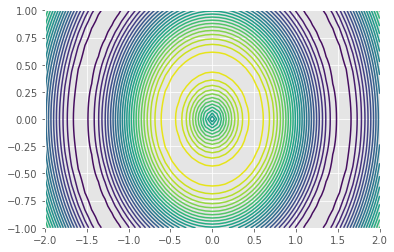

In [6]:
# same data as before, this time calling plt.contour

plt.contour(X, Y, Z, 30)
plt.show()

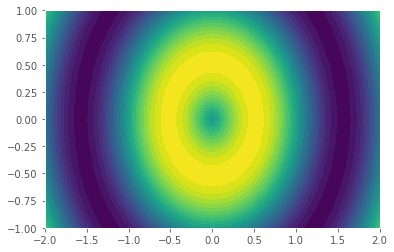

In [7]:
# same data as before, this time calling plt.contourf

plt.contourf(X, Y, Z, 30)
plt.show()

## Histograms
#### 1-D Histograms
- `plt.hist(data, bins=num[, range=()])`
    - can specify the number of bins to use
    - optional `range=()` arg accepts a nest of tuples to set x and y axis ranges
        - `range=((xmin, xmax), (ymin, ymax))`
        
- Adding other options
    - `counts, bins, patches = plt.hist(data, bins=)`
    - on datacamp, need to check this out more
        - I believe this stores values in those vars that are generated from the plot

#### 2-D Histograms
- `plt.hist2d(x, y, bins(xnum,ynum))`
    - 'x' and 'y' are 1-d arrays of the same length
    - bins are specified as a tuple of integers 
        - 'xnum' and 'ynum' specify the axes
    - the bins are rectangular in shape
- `plt.hexbin(x, y, gridsize=(xnum,ynum)[, extent=()])`
    - works similarly to hist2d, but uses hexagonal bins
    - `gridsize` is the number of hexagonal bins to draw in the x, y directions
    - `extent=()` works like `range` above, but only supply 1 tuple
        - `extent=(xmin, xmax, ymin, ymax)`

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189
3      4      James Madison         163
4      5       James Monroe         183



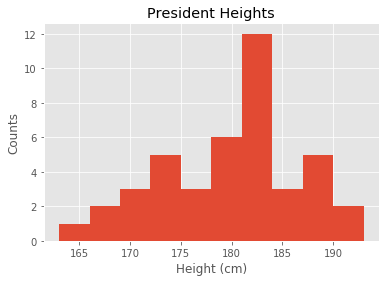

In [8]:
# import president height data
df = pd.read_csv('DSHB_Data\president_heights.csv')
print(df.head())
print()

plt.hist(df['height(cm)'], bins=10)
plt.title('President Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Counts')
plt.show()

## Color Images
- Usually 3 2d arrays
    - 1 2d array (or channel) for each color in RGB
    - channel values are 0-1 as floats or 0-255 as ints
- Loading images
    - `img = plt.imread('filename.png')`
- Showing images
    - `plt.imshow(img_var[, extent=()])`
        - optional `extent=(xmin, xmax, ymin, ymax)` is useful when resampling if image shape is distorted
            - can use the original image shape as the maxes, with 0 as the mins, fixing aspect ratio
        - `plt.axis('off')` # turn axis and labels off
    - `plt.show()`
- Converting to grayscale method 1
    - collapse the RGB channels by averaging along axis 2
        - `collapsed = img.mean(axis=2)`
        - now a 2d array
    - explicityly set the cmap to gray
        - `plt.set_cmap('gray')`
    - `plt.imshow(collapsed, cmap='gray')`
    - `plt.axis('off')`
    - `plt.show()`
- Converting to grayscale method 2
    - get the sum of the intensities, then plot
        - `intensity = img.sum(axis=2)`
    - `plt.imshow(intensity, cmap='gray)`
    - `plt.axis('off')`
    - `plt.show()`

#### Extract and Plot Histograms of the RGB Elements of an Image
- Extract 2d arrays for each color
    - `red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]`
        - assumes a color image is stored in variable called `image`
- Flatten the RGB channels into 1d
    - `red_pixels = red.flatten()`
    - `blue_pixels = blue.flatten()`
    - `green_pixels = green.flatten()`
- Overlay the three plots and show
    - `plt.title('Add Title')`
    - `plt.xlim((0,256))`
    - `plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)`
    - `plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)`
    - `plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)`
    - `plt.show()`

#### Rescaling Images
- Useful when pixel intensity is in a narrow range
    - instead of the full 0-255 available for typical RGB style
    - this example is using a black and white image with only intensity values
- Use **Histogram Equalization** to spread out the range of values
    - this will enhance subtle contrasts to 'sharpen' the image
    - useful when original intensities have a narrow range (i.e. 125-250 vs. 0-255)
    - used in astronomy and medical imaging to see more features
- First, view a histogram of the original pixel intensities
    - `orig = plt.imread('filename.jpg')`
    - `pixels = orig.flatten()` 
        - use numpy `flatten()` to convert the 2d array into 1d to use with 'hist'
    - `plt.hist(pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
        - optional args
            - set the scale of the hist to 255 for the image intensity values
            - `normed=True` rescales the total area under the hist to be 1
            - `alpha=0.3` creates transparency in the bars
    - `plt.show()`
    - save the original max and min pixel intensities
        - `minval, maxval = orig.min(), orig.max()`
- Second, rescale the image
    - `rescaled = (255/(maxval-minval)) * (pixels - minval)`
    - view the new image
        - `plt.imshow(rescaled)`
        - `plt.axis('off')`
        - `plt.show()`
- Third, view an overlay of the two histograms
    - `plt.hist(orig.flatten(), bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
    - `plt.hist(rescaled.flatten(), bins=256, range=(0,256), normed=True, color='green', alpha=0.3)`
    - `plt.legend(['original', 'rescaled'])`
    - `plt.show()`
- **Increase the Contrast for a Rescaled Image**
    - Get the Cumulative Distribution Function **(CDF)** from the original image
        - increments the percentage of the distrubtion as your x value increases
            - this = 0 at your first x value, finally equalling 1 at the max x value
        - adds up the total area under the curve from left to right
    - Plotting the CDF over a hist of the original pixel intensity
        - `plt.hist(pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
        - `plt.twinx()` create a separate y value range using the same x axis
        - > `orig_cdf, bins, patches = plt.hist(pixels, cumulative=True, bins=256, range=(0,256), normed=True, color='red', alpha=0.3)`
            - I think that adding vars before this functions stores values in those vars from the plot!
            - stores the CDF function, location of the bins, and a list of graphics objects
        - `plt.title('Image Histogram and CDF')`
        - `plt.xlim((0,255))`
        - `plt.show()`
    - Increase the contrast using the CDF
        - `new_pixels = np.interp(pixels, bins[:-1], orig_cdf*255)`
            - use numpy's interpolation to comupte new values based on the rescaled CDF, bins, and original values
        - `new = new_pixels.reshape(orig.shape)` reshape based on the original shape
        - `plt.imshow(new)`
        - `plt.axis('off')`
        - `plt.show()`
        - the CDF of this 'new' image is closer to a ramp in appearance
            - called histogram rescaling because using hist CDF to do it
    - View the new histogram and CDF
        - `plt.hist(new_pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
        - `plt.twinx()`
        - `plt.hist(new_pixels, cumulative=True, bins=256, range=(0,256), normed=True, color='red', alpha=0.1)`
        - `plt.xlim((0,255))`
        - `plt.show()`

# Seaborn
- Need to `import seaborn as sns`
    - Because seaborn uses pyplot, you must also import that
- call `plt.show()` to display

## Regressions
#### lmplot
- `sns.lmplot(x='xcolumn', y='ycolumn', data=df)`
    - where the columns are column names from a pandas dataframe (df)
    - creates a scatter plot of the data with a regression line
- Adding different categories (lines/bars/points) as different colors    
    - Add the optional args `hue='col_name', palette='Set1'` after `data=`
        - will color based on factors (categories) contained within 'col_name'
        - i.e. male vs female if 'col_name' is 'Sex'
        - the palette defines the colors 'Set1' in this example
- Separate into different plots based on categories
    - Add the optional arg `col='col_name'`
        - will generate a new plot for each value in 'col_name' in different columns
    - Add the optional ar `row='col_name'`
        - creates multiple plots stacked

#### regplot
- More control that 'lmplot'
- `sns.regplot(x= , y= , data= , scatter= , order= , color= , label= )`
    - `scatter=` set `None` or `True` to display scatter points
    - `order=` specifies the polynomial order of the regression
    - use `color=` and `label=` when creating multiple plots
    - to create multiple plots, you can provide the same x, y data, and only change color/label
        - use `plt.legend(loc='')` to show the legend

#### residplot
- Plotting Residuals
    - `sns.residplot(x='xcolumn', y='ycolumn', data=df[, color=''])
    - can specify the color for the residual plot
    - works like lmplot
        - except x, y can be numpy arrays, in which case the 'data' arg is not needed

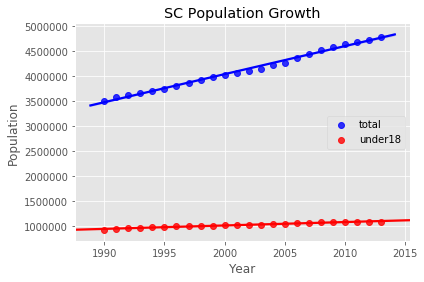

In [9]:
# import state population data
df = pd.read_csv('DSHB_Data\state-population.csv')

# filter the total population
sc_totes_filter = np.logical_and(df['state/region'] == 'SC', df['ages'] == 'total')
sc_pop_data = df[sc_totes_filter]
sc_sorted_pop_data = sc_pop_data.sort_values('year')
sc_sorted_pop_data.reset_index(inplace=True)
del sc_sorted_pop_data['index']

# filter the under18 population
sc_young_filter = np.logical_and(df['state/region'] == 'SC', df['ages'] == 'under18')
sc_pop_young = df[sc_young_filter]
sc_sorted_young_data = sc_pop_young.sort_values('year')
sc_sorted_young_data.reset_index(inplace=True)
del sc_sorted_young_data['index']


sns.regplot(x='year', y='population', label='total', color='blue', data=sc_sorted_pop_data)
sns.regplot(x='year', y='population', label='under18', color='red', data=sc_sorted_young_data)
plt.title('SC Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='center right')
plt.show()

## Univariate Plots
#### Strip Plot and Swarm Plot
- Draw numbers on a single number line showing the distribution of points within that variable
    - shows density in certain areas, as well as making outliers more obvious
- `sns.stripplot([x='xcol_name',] y='col_name' , data=df[, hue='col_name'][, size=num, jitter=True])`
    - only looking at one var at a time
    - can add `plt.ylabel()` and `plt.title()` as needed
    - adding a categorical 'x' column will draw separate lines for each category
    - adding the `size` and `jitter` args will spread out the points enough to see groupings better
- `sns.swarmplot([x='xcol_name',] y='col_name' , data=df[, hue='col_name'])`
    - works similarly to 'stripplot' except no values overlap, and patterns can be clearer
    - `hue=` will split the points into diff colors, based on the values in that column
    - to rotate the graph
        - switch the x and y vars, and use `orient='h'` as an arg

#### Box Plots
- `sns.boxplot(x='xcol', y='ycol', data=df)`

#### Violin Plots
- Similar to boxplots, but provide a density distrubtion shape
    - `sns.violinplot(x='xcol', y='ycol', data=df)`

#### Overlaying Multiple Univariate Plots
- Example: a violin plot with a jitter stripplot over it
    - `sns.violinplot(x='xcol', y='ycol', data=df, inner=None, color='lightgray')`
        - `inner=None` will display the inner boxplot
        - `color='lightgray'` to keep in background
    - `sns.stripplot(x='xcol', y='ycol', data=df, size=4, jitter=True)`
        - create a stripplot with jitter
    - any axis labels, titles, only need to be added once at the end prior to showing the plot

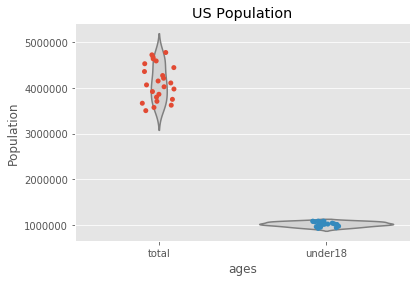

In [10]:
# using state population data

filter = df['state/region'] == 'SC'
sc_data = df[filter]
sc_sorted_data = sc_data.sort_values('year')
sc_sorted_data.reset_index(inplace=True)
del sc_sorted_data['index']

sns.violinplot(x='ages', y='population', data=sc_sorted_data, inner=None, color='lightgray')
sns.stripplot(x='ages', y='population', data=sc_sorted_data, size=5, jitter=True)
plt.title('US Population')
plt.ylabel('Population')
plt.show()

## Multi-Variate Plots
#### Joint Plots
- Plot bivariate data as a scatter plot
- p value and r value are displayed automatically
- individual histograms are displayed automatically on the top and right of the graph
- `sns.jointplot(x='xcol', y='ycol', data=df[, kind='kde')`
    - default is a scatter plot and traditional histogram for each variable
    - `kind='kde'` enables 'kernel density estimation'
        - smoothes a contour density plot instead of scatter, and smoothes the histograms
    - `kind='scatter'`
    - `kind='reg'` regression
    - `kind='resid'`
    - `kind='hex'`

### Pair Plots
- Plot every variable against every other variable
- `sns.pairplot(df[, hue='col'])`
    - can separate by any categorical column
- can add the `kind` arg as above

#### Heat Maps
- Produce a covariance matrix first, illustrating the correlation between each variable
    - as `covariance` for this example
- `sns.heatmap(covariance)`
- good to look at correlations for many variables all at once (like genes)

   PRCP  SNWD  SNOW  TMAX  TMIN  AWND  WDF2  WDF5  WSF2  WSF5  WT01  WT05  \
0     0     0     0    72    33    12   340   310    36    40 -9999 -9999   
1    41     0     0   106    61    32   190   200    94   116 -9999 -9999   
2    15     0     0    89    28    26    30    50    63    72     1 -9999   
3     0     0     0    78     6    27    40    40    45    58     1 -9999   
4     0     0     0    83    -5    37    10    10    67    76 -9999 -9999   

   WT02  WT03  
0 -9999 -9999  
1 -9999 -9999  
2 -9999 -9999  
3 -9999 -9999  
4 -9999 -9999  


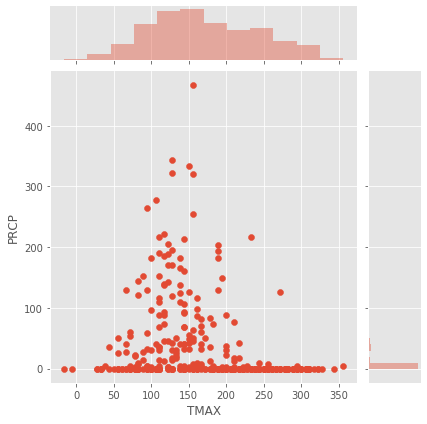

In [11]:
# using seattle2014 weather data
stl = pd.read_csv('DSHB_Data\Seattle2014.csv')

stl_df = stl.iloc[:,range(3,17)]
print(stl_df.head())

sns.jointplot(x='TMAX', y='PRCP', data=stl_df)
plt.show()

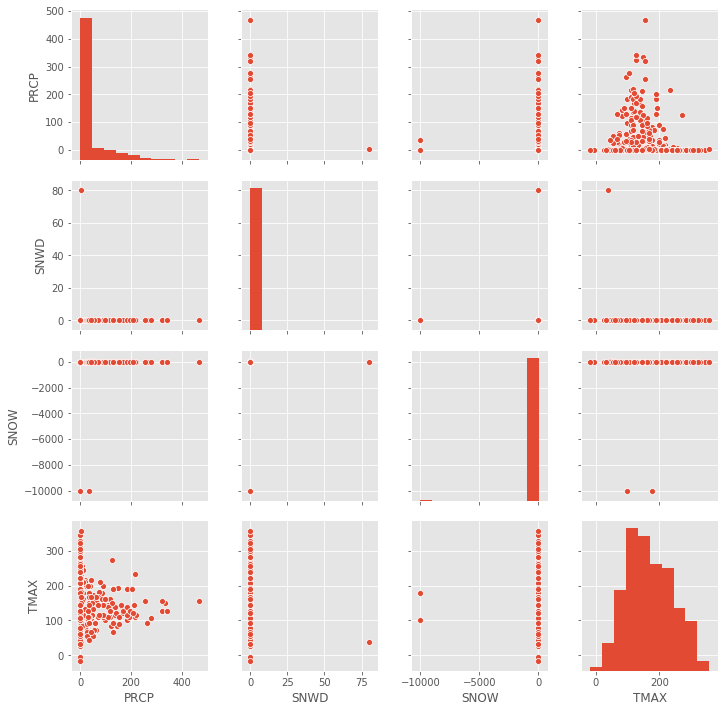

In [12]:
# using seattle2014 weather data
stl = pd.read_csv('DSHB_Data\Seattle2014.csv')

stl_df = stl.iloc[:,range(3,7)]

sns.pairplot(stl_df)
plt.show()